In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
pubchem_id =  pd.read_csv('../data/nsc_cid_smiles.csv')
translater = {pubchem_id['SMILES'][i]:pubchem_id['CID'][i] for i in pubchem_id.index}

In [3]:
corr = pd.read_csv("../DrugCell/data_rcellminer/weight_corr.csv", index_col=0)
corr.columns = [translater[i] for i in corr.columns]

In [4]:
t = []
for i in [list(corr[i].sort_values(ascending=False)[:20].index) for i in corr.columns]:
    t.extend(i)

In [5]:
res = pd.DataFrame([[i, t.count(i)] for i in set(t)]) \
    .sort_values(1, ascending=False) \
    .reset_index(drop=True)
res.index = list(res[0])
res = res.drop(0, axis=1)
res.columns = ['counts']

In [6]:
res.T

,EML4,GO:0008150,UGT2B10,LGALS4,LAMB4,RBBP9,COL6A6,CPM,SIGLEC7,PTPRCAP,...,GO:0007628,GO:0071702,PCMT1,GO:0048864,SIK3,GO:0007338,GO:1904837,GO:0048706,GO:0030225,GO:0046854
counts,167,167,71,64,62,61,61,60,58,54,...,1,1,1,1,1,1,1,1,1,1


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

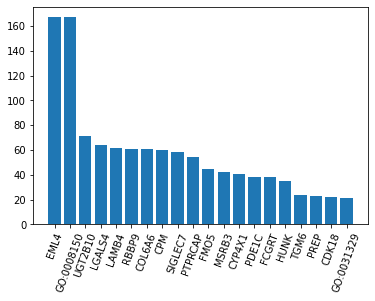

In [7]:
plt.bar(
    res[:20].index,
    res[:20]['counts']
)
plt.xticks(rotation=70)